In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [2]:
# For Jupyter Notebooks:
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

In [17]:
qc = QuantumCircuit ()

In [8]:
from qiskit import QuantumRegister

In [ ]:
qr  =  QuantumRegister(2,'qregs')

In [18]:
qc.add_register(qr)
qc.qregs

[QuantumRegister(2, 'qRegs')]

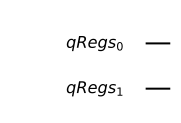

In [20]:
qc.draw(output= "mpl")

In [21]:
qc.h()

TypeError: h() missing 1 required positional argument: 'qubit'

In [24]:
qc.h(qr[0]);

AttributeError: 'InstructionSet' object has no attribute 'draw'

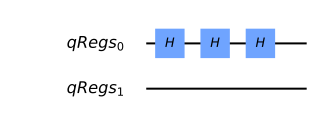

In [27]:
qc.draw(output="mpl")

In [28]:
qc.cx(qr[0],qr[1])

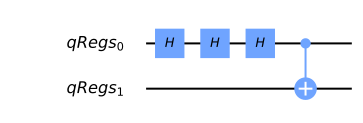

In [29]:
qc.draw(output="mpl")

In [30]:
Aer.backends()

[<QasmSimulator('qasm_simulator') from AerProvider()>,
 <StatevectorSimulator('statevector_simulator') from AerProvider()>,
 <UnitarySimulator('unitary_simulator') from AerProvider()>,
 <PulseSimulator('pulse_simulator') from AerProvider()>]

In [31]:
vector_simulator = Aer.get_backend( 'statevector_simulator')

In [32]:
job = execute(qc, vector_simulator)

In [33]:
ket = job.result().get_statevector()


In [34]:
for ampl in ket:
    print(ampl)


(0.7071067811865476+0j)
0j
0j
(0.7071067811865475-8.659560562354933e-17j)


In [35]:
new_qc =  QuantumCircuit(qr)


In [36]:
new_qc.initialize(ket, qr)

In [38]:
from qiskit import ClassicalRegister 

In [39]:
cr = ClassicalRegister(2, 'creg')

qc.add_register(cr)

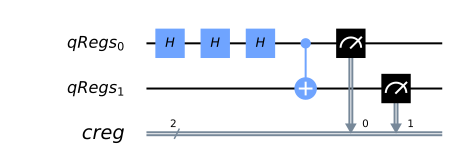

In [40]:
qc.measure(qr[0], cr[0])
qc.measure(qr[1], cr[1])
qc.draw(output = 'mpl')

In [41]:
emulator = Aer.get_backend('qasm_simulator')
job  = execute(qc, emulator , shots = 8192)

In [42]:
hist = job.result().get_counts()
print(hist)

{'11': 4134, '00': 4058}


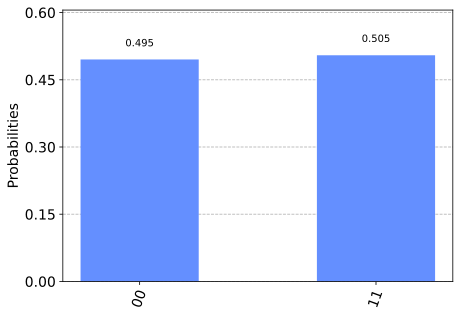

In [43]:
from qiskit.visualization import plot_histogram
plot_histogram(hist)

In [44]:
job =  execute(qc, emulator, shots = 10, memory = True)
samples =  job.result().get_memory()
print( samples)

['11', '11', '11', '00', '11', '11', '00', '00', '11', '00']


In [46]:
qubit = QuantumRegister(8)
bit = ClassicalRegister(8)
circuit = QuantumCircuit(qubit , bit)

circuit.x(qubit[7])
circuit.measure(qubit, bit)
execute(circuit, emulator, shots= 8192).result().get_counts()

{'10000000': 8192}

In [47]:
print ('The following shows quantum register consisting of threee qubits, and no classical register.')

The following shows quantum register consisting of threee qubits, and no classical register.


In [50]:
qc = QuantumCircuit(3)

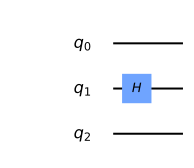

In [51]:
qc.h(1)
qc.draw(output = 'mpl')

In [53]:
print("Two Qubit Circuit for which we'll take a single bit of output")

Two Qubit Circuit for which we'll take a single bit of output


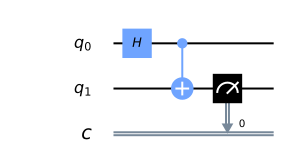

In [55]:
qc = QuantumCircuit(2,1)
qc.h(0)
qc.cx(0,1)
qc.measure(1,0)
qc.draw(output = 'mpl')

In [56]:
print("creating custom gates")

creating custom gates


In [57]:
sub_circuit =  QuantumCircuit(3, name='toggle_cx')
sub_circuit.cx (0,1)
sub_circuit.cx(1,2)
sub_circuit.cx(0,1)
sub_circuit.cx (1,2)

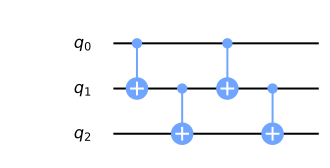

In [58]:
sub_circuit.draw(output = 'mpl')

In [59]:
toggle_cx = sub_circuit.to_instruction()


In [60]:
qr = QuantumRegister(4)
new_qc = QuantumCircuit(qr)

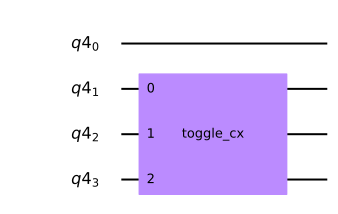

In [61]:
new_qc.append(toggle_cx, [qr[1],qr[2],qr[3]])
new_qc.draw(output='mpl')

In [62]:
IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [64]:
provider  = IBMQ.get_provider(hub =  'ibm-q')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [65]:
for backend  in provider.backends():
    print(backend.status())

BackendStatus(backend_name='ibmq_qasm_simulator', backend_version='0.1.547', operational=True, pending_jobs=1, status_msg='active')
BackendStatus(backend_name='ibmqx2', backend_version='2.0.5', operational=True, pending_jobs=10, status_msg='active')
BackendStatus(backend_name='ibmq_16_melbourne', backend_version='2.0.6', operational=True, pending_jobs=8, status_msg='active')
BackendStatus(backend_name='ibmq_vigo', backend_version='1.0.2', operational=True, pending_jobs=12, status_msg='active')
BackendStatus(backend_name='ibmq_ourense', backend_version='1.0.1', operational=True, pending_jobs=17, status_msg='active')
BackendStatus(backend_name='ibmq_london', backend_version='1.1.0', operational=True, pending_jobs=5, status_msg='active')
BackendStatus(backend_name='ibmq_burlington', backend_version='1.1.4', operational=True, pending_jobs=3, status_msg='active')
BackendStatus(backend_name='ibmq_essex', backend_version='1.0.1', operational=True, pending_jobs=6, status_msg='active')
BackendS

In [67]:
real_device = provider.get_backend('ibmq_16_melbourne')

In [68]:
properties =  real_device.properties()
coupling_map =  real_device.configuration().coupling_map

In [69]:
from qiskit.providers.aer.noise import NoiseModel
noise_model = NoiseModel.from_backend(properties)

In [70]:
qc = QuantumCircuit(2,2)
qc.x(1)
qc.measure(0,0)
qc.measure(1,1)
job = execute(qc,emulator,shots = 1024, noise_model = noise_model, coupling_map = coupling_map, basis_gates = noise_model.basis_gates)

job.result().get_counts()

{'10': 946, '00': 72, '11': 6}

In [73]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.12.0',
 'qiskit-aer': '0.4.1',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.5.0',
 'qiskit-aqua': '0.6.5',
 'qiskit': '0.16.2'}